In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from get_dataframes import get_global_df


In [2]:
global_df = get_global_df(results_path="../../../experiments/final_experiments")


<Figure size 1500x1000 with 0 Axes>

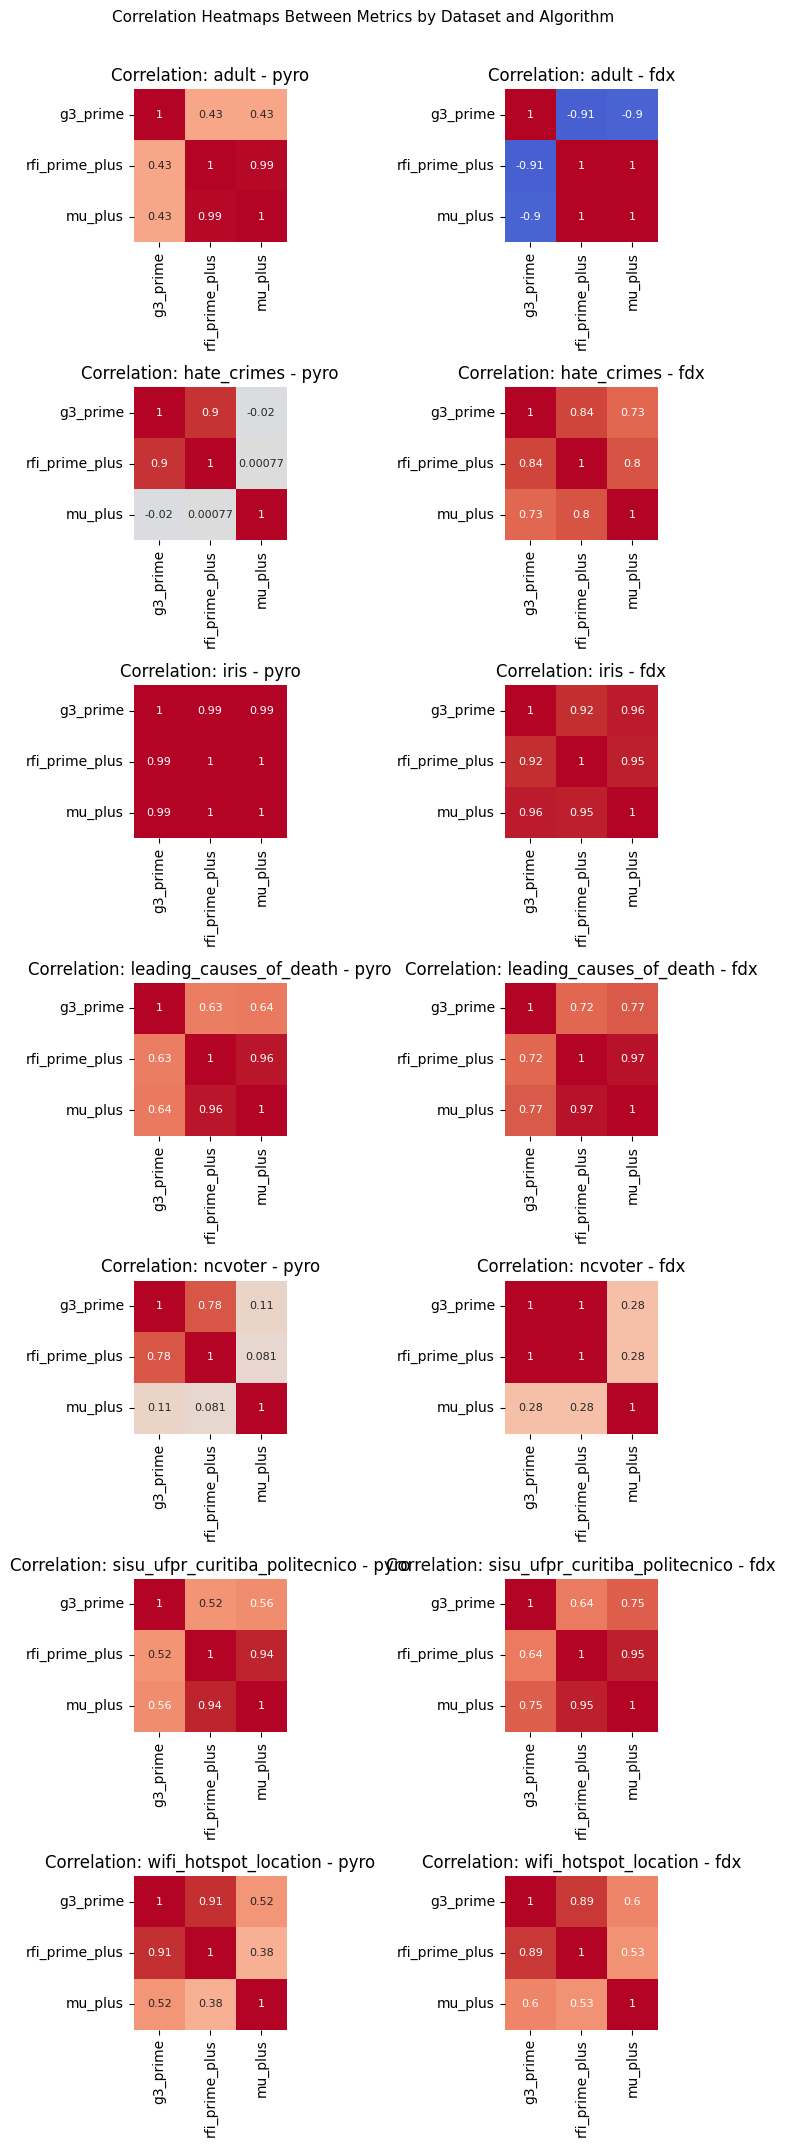

In [3]:

# Create correlation heatmaps between the three metrics for each algorithm and dataset
plt.figure(figsize=(15, 10))

# Get unique combinations of algorithm and dataset
dataset_algorithm_combinations = []
for dataset in global_df['dataset'].unique():
    for algorithm in ['pyro', 'fdx']:
        dataset_algorithm_combinations.append((dataset, algorithm))

# Calculate the grid layout dimensions
n_plots = len(dataset_algorithm_combinations)
n_cols = 2
n_rows = (n_plots + n_cols - 1) // n_cols  # Ceiling division

# Create the figure and subplots

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))
plt.subplots_adjust(hspace=0.3, wspace=0.3)  # Add spacing between subplots
axes = axes.flatten() if n_plots > 1 else [axes]

# Create a correlation heatmap for each combination
for i, (dataset, algorithm) in enumerate(dataset_algorithm_combinations):
    if i < len(axes):
        # Filter data for this dataset and algorithm
        subset_df = global_df[(global_df['dataset'] == dataset) & 
                                  (global_df['algorithm'] == algorithm)]
        
        # Select only the metrics columns
        metrics_df = subset_df[['g3_prime', 'rfi_prime_plus', 'mu_plus']]
        
        # Calculate correlation matrix
        corr_matrix = metrics_df.corr()
        
        # Create heatmap
                # Create heatmap
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
                   square=True, ax=axes[i], cbar=False, annot_kws={"size": 8})
        
        axes[i].set_title(f'Correlation: {dataset} - {algorithm}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle('Correlation Heatmaps Between Metrics by Dataset and Algorithm', 
            fontsize=11, y=1.02)
plt.show()

